# Import the Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

# Load and Explore the Dataset

In [2]:
# load the data into a pandas dataframe

heart_dataset = pd.read_csv('heart.csv')

In [3]:
# first 5 rows of the dataset

heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# number of rows and columns in the dataset

heart_dataset.shape

(1025, 14)

In [5]:
# check missing vlaues in the dataset

heart_dataset.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [6]:
# correlation between independent features and dependent features

corr = heart_dataset.corr()

<Axes: >

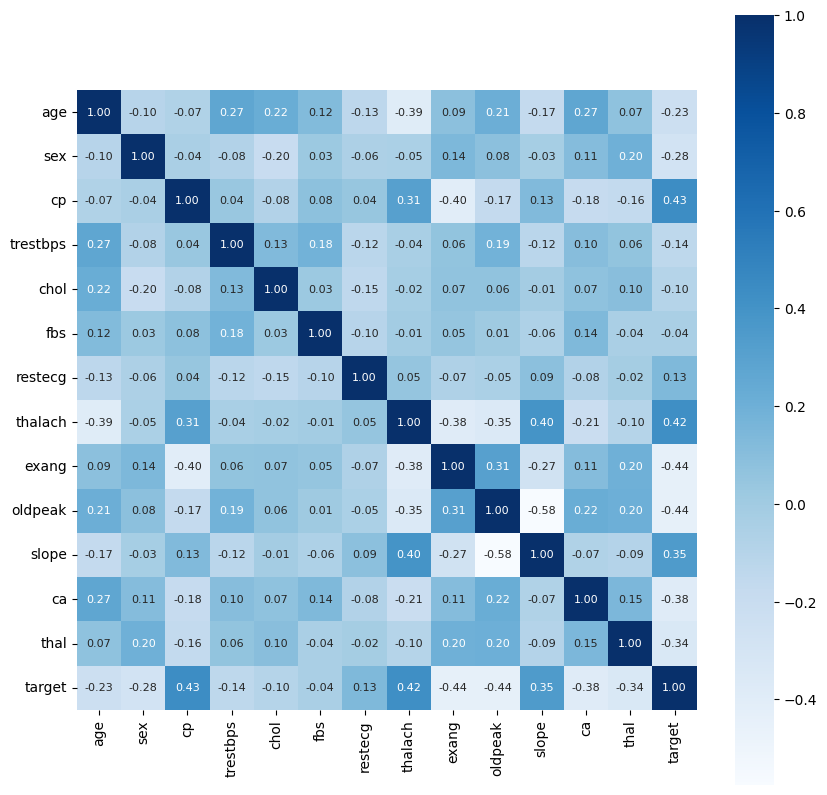

In [7]:
# plot heatmap

plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square=True, fmt = '.2f', annot= True, annot_kws = {'size':8}, cmap='Blues')

# Separating Independent feature and Target

In [8]:
X = heart_dataset.drop('target', axis=1)
y = heart_dataset['target']

# Train Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

# Decision Tree Classifier Training & Evaluation

In [10]:
# Decision Tree

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

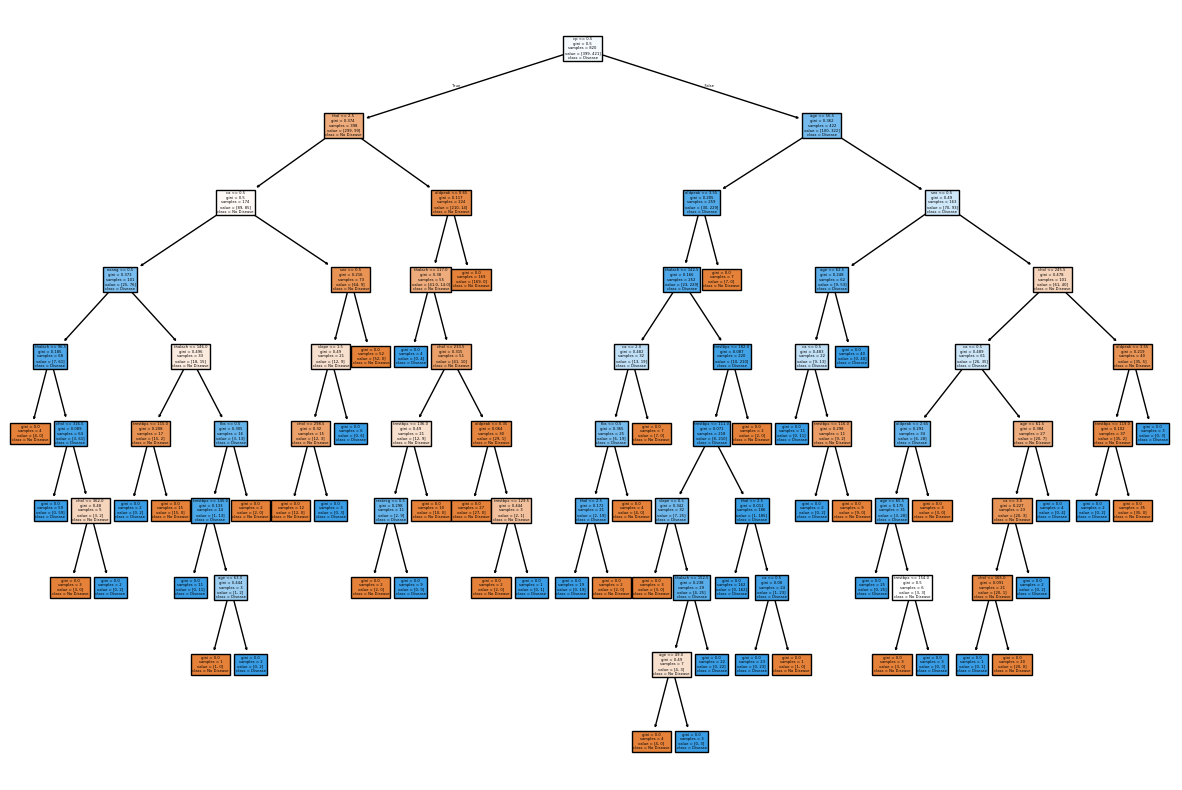

In [11]:
# Visualize the Decision Tree

plt.figure(figsize=(15,10))
plot_tree(DT, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.show()

### Large trees can indicate overfitting.

In [12]:
# evaluating the decision tree

y_pred_train = DT.predict(X_train)
y_pred_test= DT.predict(X_test)

In [13]:
print("Train Accuracy", accuracy_score(y_train, y_pred_train))
print("Test Accuracy", accuracy_score(y_test, y_pred_test))

Train Accuracy 1.0
Test Accuracy 1.0


## Control Overfitting (Tree Depth Tuning)

In [14]:
dt_pruned = DecisionTreeClassifier(max_depth=4)

In [15]:
dt_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [16]:
print("Train Accuracy", accuracy_score(y_train, dt_pruned.predict(X_train)))
print("Test Accuracy", accuracy_score(y_test, dt_pruned.predict(X_test)))

Train Accuracy 0.8731707317073171
Test Accuracy 0.8585365853658536


# Random Forest Classifier Training & Evaluation

In [17]:
# Random Forest

RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
print("Train Accuracy", accuracy_score(y_train, RF.predict(X_train)))
print("Test Accuracy", accuracy_score(y_test, RF.predict(X_test)))

Train Accuracy 1.0
Test Accuracy 1.0


## Control Overfitting (Tree Depth Tuning)

In [19]:
RF = RandomForestClassifier(n_estimators=100, max_depth=4)
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [20]:
print("Train Accuracy", accuracy_score(y_train, RF.predict(X_train)))
print("Test Accuracy", accuracy_score(y_test, RF.predict(X_test)))

Train Accuracy 0.8963414634146342
Test Accuracy 0.8536585365853658


# Interpret Feature Importances

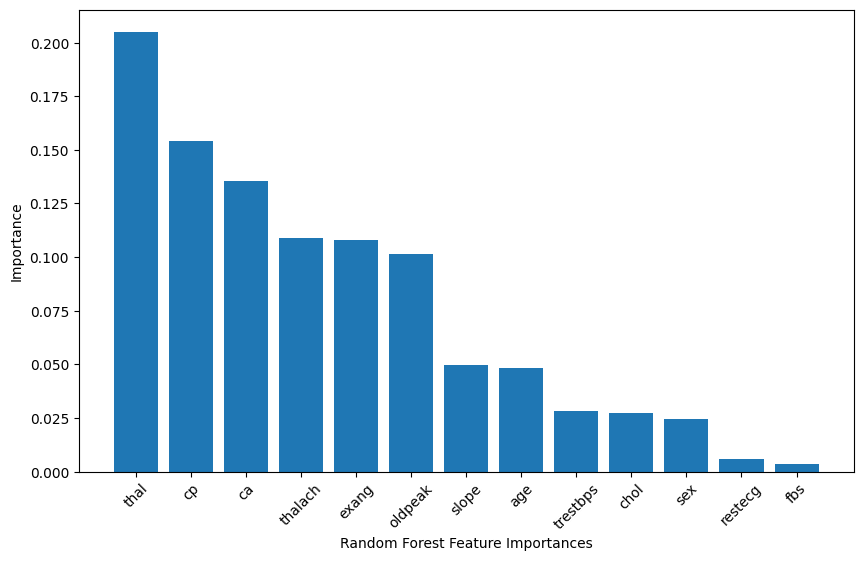

In [21]:
importances = RF.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(X.shape[1]), importances[indices], align = 'center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.ylabel("Importance")
plt.xlabel("Random Forest Feature Importances")
plt.show()

# Cross-Validation for Robust Evaluation

In [22]:
dt_cv=DecisionTreeClassifier(max_depth=4)
rf_cv=RandomForestClassifier(n_estimators=100, max_depth=4)

dt_scores=cross_val_score(dt_cv, X, y, cv=5)
rf_scores=cross_val_score(rf_cv, X, y, cv=5)

print("Decision Tree CV Accuracy:", dt_scores.mean())
print("Random Forest CV Accuracy:", rf_scores.mean())

Decision Tree CV Accuracy: 0.8341463414634147
Random Forest CV Accuracy: 0.8848780487804879
